# Исследование объявлений о продаже квартир

**Данные**

В проекте анализируются данные архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах от сервиса Яндекc.Недвижимость:

- Расстояние до ближайшего аэропорта в метрах (м)
- Число балконов
- Высота потолков (м)
- Расстояние до центра города (м)
- Сколько дней было размещено объявление (от публикации до снятия)
- Дата публикации
- Этаж
- Всего этажей в доме
- Апартаменты (булев тип)
- Площадь кухни в квадратных метрах (м²)
- Цена на момент снятия с публикации
- Жилая площадь в квадратных метрах (м²)
- Название населённого пункта
- Свободная планировка (булев тип)
- Число парков в радиусе 3 км
- Расстояние до ближайшего парка (м)
- Число водоёмов в радиусе 3 км
- Расстояние до ближайшего водоёма (м)
- Число комнат
- Квартира-студия (булев тип)
- Общая площадь квартиры в квадратных метрах (м²)
- Число фотографий квартиры в объявлении


**Цель исследования:** установить параметры, которые влияют на рыночную стоимость объектов недвижимости. 

**Ход исследования:**
 1. Изучение данных из файла.
 2. Предобработка данных.
 3. Расчёты и добавление результатов в таблицу
 4. Общий вывод.

## Изучение данных из файла

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #чтение файла с данными и сохранение в df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


### Вывод

Таблица с данными имеет 23699 строк и 22 столбца.

Данные в таблице имеют типы int64, float64, object, bool. 

В столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, kitchen_area, есть незаполненные ячейки.

Название колонки cityCenters_nearest необходимо привести к змеиному регистру. Названия некоторых колонок неинформативны.

## Предобработка данных

### Названия колонок ###

In [5]:
df.columns.tolist() #получим общий список названий колонок

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [6]:
cols_new = ['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'is_studio',
 'open_plan',
 'kitchen_area',
 'number_of_balconies',
 'locality_name',
 'distance_nearest_airport',
 'distance_city_сenter',
 'parks_around_3000_m',
 'distance_nearest_park',
 'ponds_around_3000_m',
 'distance_nearest_ponds',
 'days_exposition']

In [7]:
df.set_axis(cols_new, axis='columns', inplace=True) #переименуем колонки
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'is_studio',
 'open_plan',
 'kitchen_area',
 'number_of_balconies',
 'locality_name',
 'distance_nearest_airport',
 'distance_city_сenter',
 'parks_around_3000_m',
 'distance_nearest_park',
 'ponds_around_3000_m',
 'distance_nearest_ponds',
 'days_exposition']

### Проверка на явные дубликаты ###

In [8]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено

### Обработка дубликатов в столбце locality_name ###

In [9]:
len(df['locality_name'].unique()) #посчитаем количество уникалтных значений в столбце

365

Приведем написание городов к строчному регистру

In [10]:
df['locality_name'] = df['locality_name'].str.lower()
len(df['locality_name'].unique())

365

Кличество уникальных значений не изменилось. Проведем визуальный осмотр данных.

In [11]:
df['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка

В списке названий населенных пунктов обращают на себя внимание одинаковые названия, отличающиеся употреблением букв "е" и "ё", напрмер "поселок мурино" и "посёлок мурино". Заменим "ё" на "е" в этом столбце. 

In [12]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
len(df['locality_name'].unique())

331

Удалось исключить 34 дубликата

### Обработка пропущенных значений ##

Найдем количество и процент пропущенных значений в столбцах

In [13]:
df.isnull().sum().sort_values(ascending=False) #выведем количество пропущенных значений

is_apartment                20924
distance_nearest_park       15620
distance_nearest_ponds      14589
number_of_balconies         11519
ceiling_height               9195
distance_nearest_airport     5542
distance_city_сenter         5519
ponds_around_3000_m          5518
parks_around_3000_m          5518
days_exposition              3181
kitchen_area                 2278
living_area                  1903
floors_total                   86
locality_name                  49
total_images                    0
last_price                      0
is_studio                       0
floor                           0
number_of_rooms                 0
first_day_exposition            0
total_area                      0
open_plan                       0
dtype: int64

In [14]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100 #выведем процент пропущенных значений

is_apartment               88.29
distance_nearest_park      65.91
distance_nearest_ponds     61.56
number_of_balconies        48.61
ceiling_height             38.80
distance_nearest_airport   23.38
distance_city_сenter       23.29
ponds_around_3000_m        23.28
parks_around_3000_m        23.28
days_exposition            13.42
kitchen_area                9.61
living_area                 8.03
floors_total                0.36
locality_name               0.21
total_images                0.00
last_price                  0.00
is_studio                   0.00
floor                       0.00
number_of_rooms             0.00
first_day_exposition        0.00
total_area                  0.00
open_plan                   0.00
dtype: float64

**is_apartment**

Самое большое количество пропусков в столбце is_apartment - 88%. Вероятно, при размещении объявлений, люди не указывали данные, т.к. их объекты относятся к жилым. Прозведем замену.

In [15]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Проверим выполненную замену

In [16]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100 #выведем процент пропущенных значений

distance_nearest_park      65.91
distance_nearest_ponds     61.56
number_of_balconies        48.61
ceiling_height             38.80
distance_nearest_airport   23.38
distance_city_сenter       23.29
ponds_around_3000_m        23.28
parks_around_3000_m        23.28
days_exposition            13.42
kitchen_area                9.61
living_area                 8.03
floors_total                0.36
locality_name               0.21
total_images                0.00
last_price                  0.00
is_studio                   0.00
is_apartment                0.00
floor                       0.00
number_of_rooms             0.00
first_day_exposition        0.00
total_area                  0.00
open_plan                   0.00
dtype: float64

Незаполненных значений в столбце is_apartment не осталось

**distance_nearest_park, distance_nearest_ponds, distance_nearest_airport, distance_city_сenter, ponds_around_3000_m, parks_around_3000_m**

Следующие колонки с максимальным количеством пропусков - distance_nearest_park и distance_nearest_ponds. Мы не можем заполнить пропуски в этих столбцах, т.к. заполнение таких данных медианой или средним приведет к искажению информации. Т.к. эти колонки заполнялись на основании картографических данных, необходимо передать информацию о пропусках коллегам, ответственным за сбор этих данных.
Это касается и колонок distance_nearest_airport, distance_city_сenter, ponds_around_3000_m, parks_around_3000_m

**number_of_balconies**

Проверим данные в столбце number_of_balconies

In [17]:
print(df.groupby('number_of_balconies')['number_of_balconies'].count())

number_of_balconies
0.00    3758
1.00    4195
2.00    3659
3.00      81
4.00     183
5.00     304
Name: number_of_balconies, dtype: int64


В целом, данные по балконам выглядят близкими к реальным. Заполнять пропуски в данном случае будет некорректно, т.к. данные о балконах относятся к категориальным, а не количественым.

**ceiling_height**

Столбец ceiling_height (высота потолков) имеет 38,8% пропущенных значений. В данной работе оставим эти значения незаполненными по причинам:
1. Нет возможности заполнить пропуски, опираясь на дополниетльные данные (например, можно было бы заполнить высоту потолков исходя из высоты потолков домов аналогичной серии).
2. Количестов пропусков велико - заполнение данных медианой или средним по всей выборке может привести к искажению данных.
3. В работе не поставлено вопросов, касающихся зависимсти цены от высоты потолков; есть задача анализа этого показателя отдельно от других - ее можно выполнить на имеющихся данных.

**days_exposition**

В данном столбце 13,42% пропусков. Пропуски в этом столбце оставим незаполненными, т.к.:
1. Вероятно, часть квартир в принципе не была продана - в этом случае, заполнив пропуски, мы добавим в выборку до 13% наблюдений, которые могут значительно повлиять на результат.
2. Нет возможности заполнить пропуски, опираясь на дополниетльные данные.

**kitchen_area**                

Проанализируем медианные значения площади кухонь для квартир с разными количством комнат.

In [18]:
df.groupby('number_of_rooms')['kitchen_area'].agg({'count', 'median'})

,median,count
number_of_rooms,,
0,NaN,0
1,9.04,7213
2,8.80,7286
3,9.50,5380
4,11.10,1081
5,15.10,285
6,19.50,97
7,20.00,52
8,25.00,9


В однокомнатных квартирах площадь кухни больше, чем в двухконмнатных - вероятно, это связано с тем, что часть однокомнатных квартир могут иметь просторную кухню-гостиную. Начиная с 2 комнат и выше полощадь кухонь имеет тенденцию к увеличению с ростом числа комнат в квартире.
Исходя из представленных данных, заполнение пропущенных значений площади кухни медианными значениями площади кухни для квартир с разным количестовм комнат представляется более релевантным.
Выполним замену.

In [19]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('number_of_rooms')['kitchen_area'].transform('median'))

Проверим заполнение пропусков

In [20]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100 #выведем процент пропущенных значений

distance_nearest_park      65.91
distance_nearest_ponds     61.56
number_of_balconies        48.61
ceiling_height             38.80
distance_nearest_airport   23.38
distance_city_сenter       23.29
ponds_around_3000_m        23.28
parks_around_3000_m        23.28
days_exposition            13.42
living_area                 8.03
kitchen_area                0.83
floors_total                0.36
locality_name               0.21
total_images                0.00
last_price                  0.00
is_studio                   0.00
is_apartment                0.00
floor                       0.00
number_of_rooms             0.00
first_day_exposition        0.00
total_area                  0.00
open_plan                   0.00
dtype: float64

Осталось незаполненными 0,83% значений - скорее всего это квартиры-студии без отдельной кухни. Данным количеством пропусков можно пренебречь, т.к. они не сильно повлияют на результат исследований.

**living_area**

Проанализируем медианные значения жилой площади для квартир с разными количством комнат.

In [21]:
df.groupby('number_of_rooms')['living_area'].agg({'count', 'median'})

,median,count
number_of_rooms,,
0,18.00,183
1,17.60,7388
2,30.50,7296
3,45.00,5366
4,63.60,1089
5,91.78,292
6,123.90,99
7,145.00,53
8,161.00,12


Заменим пропуски в жилой площади медианными значениями жилой площади для квартир с разным количестовм комнат.

In [22]:
df['living_area'] = df['living_area'].fillna(df.groupby('number_of_rooms')['living_area'].transform('median'))

Проверим заполнение пропусков

In [23]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100 #выведем процент пропущенных значений

distance_nearest_park      65.91
distance_nearest_ponds     61.56
number_of_balconies        48.61
ceiling_height             38.80
distance_nearest_airport   23.38
distance_city_сenter       23.29
ponds_around_3000_m        23.28
parks_around_3000_m        23.28
days_exposition            13.42
kitchen_area                0.83
floors_total                0.36
locality_name               0.21
total_images                0.00
last_price                  0.00
is_studio                   0.00
is_apartment                0.00
floor                       0.00
living_area                 0.00
number_of_rooms             0.00
first_day_exposition        0.00
total_area                  0.00
open_plan                   0.00
dtype: float64

Все пропущеннеы значения жилой площади заполнены.

**floors_total, locality_name**

Пропуски в этих столбцах составляют 0,36% и 0,21% - таким количеством пропусков можно пренебречь.

### Преобразование типов данных

Преобразуем тип float в int в столбцах, значениях которых являются целыми числами.

In [24]:
#df = df.astype({'number_of_balconies':'Int64',
#                'last_price':'Int64',
#                'distance_nearest_airport':'Int64', 
#                'distance_city_сenter':'Int64',
#                'parks_around_3000_m':'Int64',
#                'distance_nearest_park':'Int64',
#                'ponds_around_3000_m':'Int64',
#               'distance_nearest_ponds':'Int64',
#              }, errors='ignore')

Проверим изменение типа данных.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23699 non-null  int64  
 1   last_price                23699 non-null  float64
 2   total_area                23699 non-null  float64
 3   first_day_exposition      23699 non-null  object 
 4   number_of_rooms           23699 non-null  int64  
 5   ceiling_height            14504 non-null  float64
 6   floors_total              23613 non-null  float64
 7   living_area               23699 non-null  float64
 8   floor                     23699 non-null  int64  
 9   is_apartment              23699 non-null  bool   
 10  is_studio                 23699 non-null  bool   
 11  open_plan                 23699 non-null  bool   
 12  kitchen_area              23502 non-null  float64
 13  number_of_balconies       12180 non-null  float64
 14  locali

### Вывод ###

1. Выполнено переименование столбцов.
2. Явных дубликатов не обнаружено.
3. Удалены дубликаты в наименованиях населенных пунктов.
4. Самое большое количество пропусков в столбце is_apartment 88,29% - пропуски заполнены 
5. Автоматический сбор данных по расстоянию до парков, водоемов и проч. дает от 23 до 65% пропусков (пропуски не заполнены, рекомендация ниже).
6. Высота потолков не заполнена в 38,8% случаев (пропуски не заполнены, рекомендация ниже).
7. Площадь кухни (9,61% пропусков) и жилая площадь (8,03% пропусков) заполнены медианными значениями площади кухни/жилой для квартир с разным количестовм комнат (рекомендация ниже).
8. Тип данных float64 преобразован в int64 в столбцах, в значениях которых могут быть только целые числа. 

Рекомендации:
1. Реализовать выбор населенного пункта из списка.
2. Для указания статуса жилье/аппартаменты сделать выбор из 2 взаимоисключающих условий.
3. Проверить работу автоматического сбора данных по расстоянию до парков, водоемов и проч.
4. Сделать обязательным поле ceiling_height (высота потолков), т.к. это важная характеритика квартиры.
5. Сделать обязательным поля kitchen_area (площадь кухни) living_area (жилая площадь), т.к. это основные характеритики квартиры.

## Расчёты и добавление результатов в таблицу

**Добавим в таблицу столбец с ценой квадратного метра**

In [29]:
df['square_meter_cost'] = (df['last_price']/df['total_area']) #результат деления стоимости квартиры на площадь округлим до 2 знаков после запятой
#df = df.astype({'square_meter_cost': np.int64}) #изменим тип данных нового столбца
df = df.astype({'square_meter_cost':'Int64'}, errors='ignore')
display(df.head(5)) #проверим добавление нового столбца
display(df['square_meter_cost'].median()) #выведем медианное значение нового столбца

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,False,False,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,False,False,False,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,False,False,False,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,45.00,9,False,False,False,9.50,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,False,False,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00"


95000.0

Столбец добавлен, медианное значение выглядит корректно для стоимости квадратного метра для изучаемого региона

**Добавим в таблицу столбцы с днем недели, месяца и года публикации объявления**

In [30]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S") #преобразуем данные в столбце first_day_exposition 
df.head(5)

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,False,False,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,False,False,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,45.00,9,False,False,False,9.50,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00"


Добавим новые столбцы

In [31]:
df['day_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head(5)

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,March,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,False,False,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,December,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,False,False,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,August,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,45.00,9,False,False,False,9.50,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,July,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,June,2018


Новые столбцы добавлены

**Добавим в таблицу столбец с категорией этажа. Для этого напишем функцию**

In [32]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

Проверим работу функции

In [33]:
df_test = pd.DataFrame([[1, 5], [3, 6], [10, 10]], columns=['floor', 'floors_total'])
df_test['floor_category'] = df_test.apply(floor_category, axis=1)
df_test

,floor,floors_total,floor_category
0,1,5,первый
1,3,6,другой
2,10,10,последний


Функция работает корректно, применим ее к основной таблице

In [34]:
df['floor_category'] = df.apply(floor_category, axis=1)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,March,2019,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,False,False,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,December,2018,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,False,False,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,August,2015,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,45.00,9,False,False,False,9.50,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,July,2015,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,June,2018,другой


Новый столбец с категорией этажа добавлен

**Добавим столбцы с соотношением жилой и общей площади, а также отношением площади кухни к общей**

In [35]:
df['living_total_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_total_area_ratio'] = df['kitchen_area'] / df['total_area']
df.head(5)

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,March,2019,другой,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,False,False,11.00,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,December,2018,первый,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,False,False,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,August,2015,другой,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,45.00,9,False,False,False,9.50,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,July,2015,другой,0.28,0.06
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,June,2018,другой,0.32,0.41


Столбцы добавлены

## Исследовательский анализ данных

**Ответим на поставленные вопросы**

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [36]:
df[['total_area', 'square_meter_cost', 'last_price','number_of_rooms', 'ceiling_height']].describe()

,total_area,square_meter_cost,last_price,number_of_rooms,ceiling_height
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00"
mean,60.35,"99,421.66","6,541,548.77",2.07,2.77
std,35.65,"50,306.80","10,887,013.27",1.08,1.26
min,12.00,111.83,"12,190.00",0.00,1.00
25%,40.00,"76,585.47","3,400,000.00",1.00,2.52
50%,52.00,"95,000.00","4,650,000.00",2.00,2.65
75%,69.90,"114,256.33","6,800,000.00",3.00,2.80
max,900.00,"1,907,500.00","763,000,000.00",19.00,100.00


**Площадь**

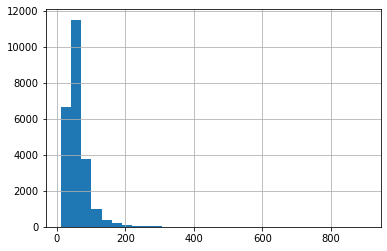

In [37]:
df['total_area'].hist(bins=30);

Построенная гистограмма не дает представления о распределении площади из-за выбросов. Т.к. большинство квартир имеют площадь до 250 кв. метров, ограничим шкалу абсцисс этим значением.

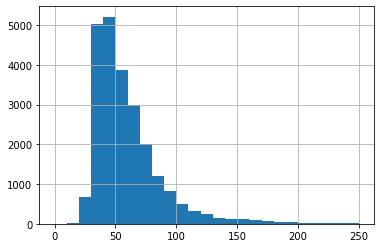

In [38]:
df['total_area'].hist(bins=25, range = (0, 250));

Распределение данных на гистограмме говорит о том, что преобладают квартиры с площадью от 40 до 50 квадратных метров - их порядка 5100. Следующими идут квартиры площадью от 30 до 40 - таких объектов около 5000. С увеличением площади количество представленных квартир этой площади снижается: от 50 до 60 кв. метров - приблизительно 3900 квартир, от 60 до 70 - 3000 квартир, от от 70 до 80 - 2000 квартир, и т.д. Количество квартир небольшой площади - от 20 до 30 метров составляет около 700.

**Цена**

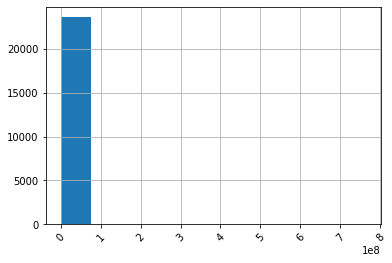

In [39]:
df['last_price'].hist(bins=10)
plt.xticks(rotation = 45);

Построенная гистограмма не дает представления о распределении цен квартир из-за выбросов. Рассмотрим данный столбец при помощи диаграммы размаха и метода describe(). 

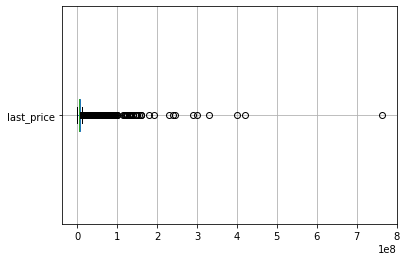

In [40]:
df.boxplot(column=['last_price'], vert=False);

In [41]:
df['last_price'].describe()

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Как видно, максимальное значение в 763 млн. дает сильное смещение распределения вправо.
Найдем межквартильный размах и рассчитаем значние правого уса, чтобы отсечь выбросы. 

In [42]:
6800000+(6800000-3400000)*1,5

(10200000, 5)

Построим график, ограничив ось абсцисс найденным значением.

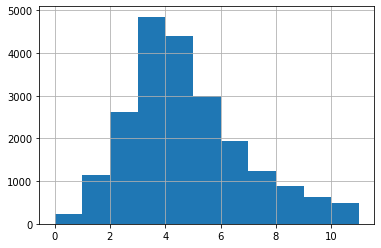

In [43]:
df['last_price_mil'] = df['last_price']/1000000
#df['last_price'].hist(bins=10, range = (0, 13260000))
df['last_price_mil'].hist(bins=11, range = (0, 11));

Основную долю в выборке - около 4800 - составляют квартиры стоимостью от 3 до 4 млн руб.Следующая по кличеству объектов группа - квартиры стоимостью от 4 до 5 млн - таких около 4,5 тысяч. Квартир стоимостью от 5 до 6 млн порядка 3000. 

**Цена квадратного метра**

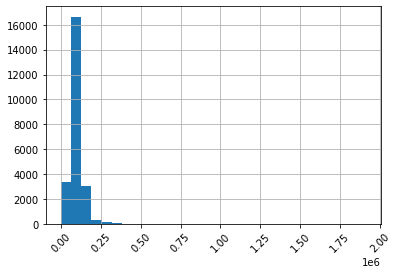

In [44]:
df['square_meter_cost'].hist(bins=30)
plt.xticks(rotation = 45);

На графике видно, что большинство объектов имеют стоимость квадратного метра около 100 000 руб. Так же шкала абсцисс имеет максимальное значение 2 000 000 руб. Вероятно это связано с выбросами - посмотрим, как выглядят такие объекты.

In [45]:
df.query('square_meter_cost > 700000')

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio,last_price_mil
1436,19,"330,000,000.00",190.00,2018-04-04,3,3.50,7.00,95.00,5,False,False,False,40.00,NaN,санкт-петербург,"23,011.00","1,197.00",3.00,519.00,3.00,285.00,233.00,"1,736,842.11",Wednesday,April,2018,другой,0.50,0.21,330.00
4859,16,"28,000,000.00",33.00,2019-04-29,1,3.50,5.00,17.60,2,False,False,False,9.04,NaN,санкт-петербург,"23,447.00","1,376.00",3.00,344.00,3.00,119.00,NaN,"848,484.85",Monday,April,2019,другой,0.53,0.27,28.00
4996,20,"124,000,000.00",124.50,2017-10-12,4,3.00,4.00,67.20,2,False,False,False,20.00,NaN,санкт-петербург,"20,399.00","1,722.00",3.00,302.00,3.00,172.00,45.00,"995,983.94",Thursday,October,2017,другой,0.54,0.16,124.00
6462,2,"82,000,000.00",114.00,2015-12-17,3,NaN,5.00,78.50,4,False,False,False,20.00,0.00,санкт-петербург,"22,460.00","3,400.00",2.00,218.00,3.00,69.00,651.00,"719,298.25",Thursday,December,2015,другой,0.69,0.18,82.00
8322,20,"39,900,000.00",55.30,2017-10-26,1,3.05,6.00,35.00,4,False,False,False,8.00,4.00,санкт-петербург,"25,685.00","2,136.00",1.00,72.00,3.00,202.00,NaN,"721,518.99",Thursday,October,2017,другой,0.63,0.14,39.90
8900,13,"190,870,000.00",268.00,2016-03-25,3,NaN,8.00,132.00,7,False,False,False,40.00,NaN,санкт-петербург,"32,440.00","5,297.00",0.00,NaN,2.00,198.00,901.00,"712,201.49",Friday,March,2016,другой,0.49,0.15,190.87
12971,19,"763,000,000.00",400.00,2017-09-30,7,NaN,10.00,250.00,10,False,False,False,20.00,2.00,санкт-петербург,"25,108.00","3,956.00",1.00,530.00,3.00,756.00,33.00,"1,907,500.00",Saturday,September,2017,последний,0.62,0.05,763.00
14706,15,"401,300,000.00",401.00,2016-02-20,5,NaN,9.00,204.00,9,False,False,False,24.00,3.00,санкт-петербург,"21,912.00","2,389.00",1.00,545.00,1.00,478.00,393.00,"1,000,748.13",Saturday,February,2016,последний,0.51,0.06,401.30
16461,17,"245,000,000.00",285.70,2017-04-10,6,3.35,7.00,182.80,4,False,False,False,29.80,NaN,санкт-петербург,"33,143.00","6,235.00",3.00,400.00,3.00,140.00,249.00,"857,542.88",Monday,April,2017,другой,0.64,0.10,245.00
16647,15,"122,000,000.00",145.00,2017-04-25,3,3.30,6.00,36.00,2,False,False,False,72.00,NaN,санкт-петербург,"33,931.00","7,023.00",2.00,478.00,3.00,250.00,335.00,"841,379.31",Tuesday,April,2017,другой,0.25,0.50,122.00


Объекты выглядят реальными, но их присутсвие в датасете затрудняет анализ цены за метр. Построим график, исключив данные объекты; так же ограничим шкалу абсцисс величиной 300 000 руб./кв. метр, т.к. большинство объектов имеют меньшую стоимость.

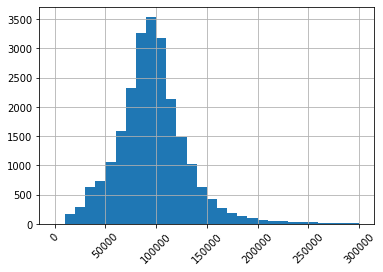

In [46]:
df.query('square_meter_cost < 700000')['square_meter_cost'].hist(bins=30, range = (0, 300000))
plt.xticks(rotation = 45);

Большинство объектов (более 3500) имеют стоимость квадратного метра в диапазоне 90 000 - 100 000 руб.; стоимость 80 000 - 90 000 и 100 000 - 110 000 имеют приблизительно по 3200 объектов; следующая по численности группа (около 2300 объектов) имеют стоимость от 70 000 до 80 000 руб. за квадратный метр.

**Количество комнат**

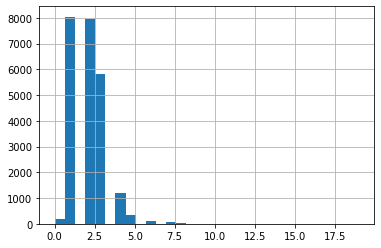

In [47]:
df['number_of_rooms'].hist(bins=30);

Практически равное количество квартир, в районе 8000 имеют 1 и 2 комнаты. Так же почти 6000 картир имеют 3 комнаты. Квартиры с количеством комнат 4-5 составлют около 1000. Квартиры с большим количеством комнат, как и квартиры студии представляют незначительную часть выборки.

**Высота потолков**

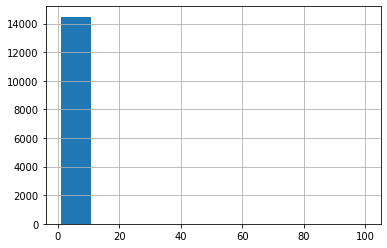

In [48]:
df['ceiling_height'].hist(bins=10);

Получившаяся гистограмма не позволяет оценить реальную картину, т.к. в выборке есть квартиры с некорректно заполненной высотой потолков в 100 м (это видно и в результатах вывода метода describe для данного столбца. Попробуем построить гистограмму, исключив экстремальные значения.

Сделаем срезы, включающие экстремальные значения.

In [49]:
df.query('ceiling_height<=1')

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio,last_price_mil
22590,16,"6,000,000.00",55.00,2018-10-31,2,1.00,12.00,32.40,7,False,False,False,10.00,NaN,санкт-петербург,"33,053.00","14,217.00",2.00,293.00,2.00,289.00,13.00,"109,090.91",Wednesday,October,2018,другой,0.59,0.18,6.00


In [50]:
df.query('ceiling_height>=10')

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio,last_price_mil
355,17,"3,600,000.00",55.20,2018-07-12,2,25.00,5.00,32.00,2,False,False,False,8.80,2.00,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.00,"65,217.39",Thursday,July,2018,другой,0.58,0.16,3.60
3148,14,"2,900,000.00",75.00,2018-11-12,3,32.00,3.00,53.00,2,False,False,False,8.00,NaN,волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"38,666.67",Monday,November,2018,другой,0.71,0.11,2.90
4643,0,"4,300,000.00",45.00,2018-02-01,2,25.00,9.00,30.00,2,False,False,False,7.00,1.00,санкт-петербург,"12,016.00","13,256.00",1.00,658.00,1.00,331.00,181.00,"95,555.56",Thursday,February,2018,другой,0.67,0.16,4.30
4876,7,"3,000,000.00",25.00,2017-09-27,0,27.00,25.00,17.00,17,False,False,True,NaN,2.00,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.00,"120,000.00",Wednesday,September,2017,другой,0.68,NaN,3.00
5076,0,"3,850,000.00",30.50,2018-10-03,1,24.00,5.00,19.50,1,True,False,False,5.50,NaN,санкт-петербург,"29,686.00","8,389.00",3.00,397.00,1.00,578.00,7.00,"126,229.51",Wednesday,October,2018,первый,0.64,0.18,3.85
5246,0,"2,500,000.00",54.00,2017-10-13,2,27.00,5.00,30.00,3,False,False,False,9.00,2.00,деревня мины,NaN,NaN,NaN,NaN,NaN,NaN,540.00,"46,296.30",Friday,October,2017,другой,0.56,0.17,2.50
5669,4,"4,400,000.00",50.00,2017-08-08,2,26.00,9.00,21.30,3,False,False,False,7.00,2.00,санкт-петербург,"28,981.00","10,912.00",1.00,305.00,0.00,NaN,267.00,"88,000.00",Tuesday,August,2017,другой,0.43,0.14,4.40
5807,17,"8,150,000.00",80.00,2019-01-09,2,27.00,36.00,41.00,13,False,False,False,12.00,5.00,санкт-петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,38.00,"101,875.00",Wednesday,January,2019,другой,0.51,0.15,8.15
6246,6,"3,300,000.00",44.40,2019-03-25,2,25.00,5.00,31.30,5,False,False,False,5.70,NaN,кронштадт,"68,923.00","50,649.00",1.00,417.00,2.00,73.00,NaN,"74,324.32",Monday,March,2019,последний,0.70,0.13,3.30
9379,5,"3,950,000.00",42.00,2017-03-26,3,25.00,5.00,30.00,2,False,False,False,5.20,NaN,санкт-петербург,"11,647.00","13,581.00",0.00,NaN,0.00,NaN,NaN,"94,047.62",Sunday,March,2017,другой,0.71,0.12,3.95


Как видно из срезов, квартиры с экстремальными значениями высоты потолков выглядят, как стандартные квартиры, т.е. вероятнее всего, заполненная высота потолков в них является ошибочной. Заменим ее на медианое значение высоты потолков.

In [51]:
df['ceiling_height'] = np.where((df.ceiling_height <= 1), df['ceiling_height'].median(), df.ceiling_height)
df['ceiling_height'] = np.where((df.ceiling_height >= 10), df['ceiling_height'].median(), df.ceiling_height)
display(df.query('ceiling_height<=1'))
display(df.query('ceiling_height>=10'))

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio,last_price_mil


,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio,last_price_mil


Экстремальные значения заменены, теперь можно постоить гистограмму.

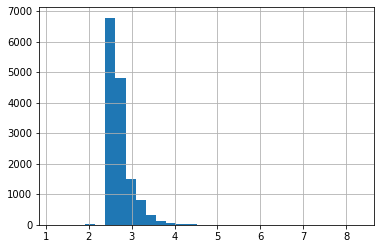

In [52]:
df['ceiling_height'].hist(bins=30);

Большинство квартир (более 6500) имеют высоту потолков в районе 2,5 метров. Так же значиельная часть квартир (почти 5000) имеют высоту потолков около 2,7 метра. Небольшая часть квартир имеют высоту потолков более 3 метров.

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [53]:
df['days_exposition'].describe()

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

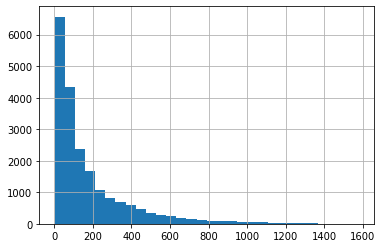

In [54]:
df['days_exposition'].hist(bins=30);

In [55]:
print('Медианное значение срока продажи квартиры:', df['days_exposition'].median())
print('Среднее значение срока продажи квартиры', df['days_exposition'].mean())

Медианное значение срока продажи квартиры: 95.0
Среднее значение срока продажи квартиры 180.88863436982163


Гистограмма показывает, что большинство квартир (более 6500) продаются в срок до 50 дней. Так же значительная часть квартир (приблизитнльно 4200 квартир) продавались в срок до 100 дней.

Медианное значение продажи в срок 95 дней почти в два раза меньше среднего срока - 180 дней. Это говорит о том, что в данных есть выбросы с большим сроком продажи.

Построим диаграмму размаха для столбца days_exposition

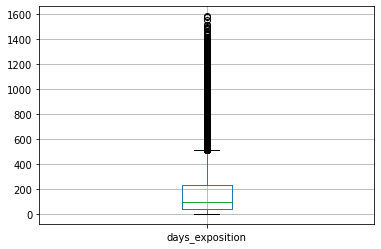

In [56]:
df.boxplot(column=['days_exposition']);

На диаграмме размаха видно, что основная часть квартир продается в срок до 500 дней (верхний "ус" упирается в значение 512). Так же есть длинный хвост выбросов, который превышает это значение. Если продажа длится более 512 дней - ее можно назвать необычно долгой; если же продажа занимает менее 45 дней - ее можно отнести к быстрой. 

Попробуем сравнить квартиры со стандартныи и долгим сроком продажи.

In [57]:
df.query('45<days_exposition<512').mean()

total_images                       9.72
last_price                 6,271,675.16
total_area                        59.37
number_of_rooms                    2.05
ceiling_height                     2.72
floors_total                      10.79
living_area                       33.73
floor                              5.95
is_apartment                       0.00
is_studio                          0.01
open_plan                          0.00
kitchen_area                      10.37
number_of_balconies                1.08
distance_nearest_airport      29,002.71
distance_city_сenter          14,428.07
parks_around_3000_m                0.60
distance_nearest_park            494.03
ponds_around_3000_m                0.76
distance_nearest_ponds           519.49
days_exposition                  168.27
square_meter_cost             96,952.19
year_exposition                2,017.21
living_total_area_ratio            0.56
kitchen_total_area_ratio           0.19
last_price_mil                     6.27


In [58]:
df.query('days_exposition>512').mean()

total_images                       8.83
last_price                 8,254,513.84
total_area                        70.43
number_of_rooms                    2.32
ceiling_height                     2.80
floors_total                      10.17
living_area                       40.12
floor                              5.64
is_apartment                       0.00
is_studio                          0.00
open_plan                          0.00
kitchen_area                      11.60
number_of_balconies                1.02
distance_nearest_airport      27,847.21
distance_city_сenter          12,692.83
parks_around_3000_m                0.71
distance_nearest_park            503.16
ponds_around_3000_m                0.94
distance_nearest_ponds           469.52
days_exposition                  769.68
square_meter_cost            104,109.25
year_exposition                2,015.66
living_total_area_ratio            0.56
kitchen_total_area_ratio           0.18
last_price_mil                     8.25


**Как видно из данных, дольше продаются квартиры, имеющие большую площадь, цену квадратного метра и, соответственно,  стоимость.**

Построим гисторамму без выбросов

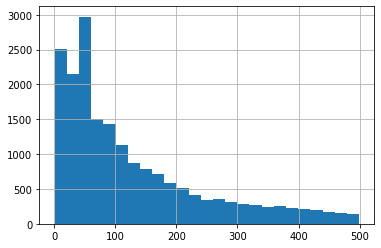

In [59]:
df.query('days_exposition<500')['days_exposition'].hist(bins=25);

На построенной гистограмме заметны 2 пика количества дней, в которые продается большое количество квартир - от 0 до 20 дней (2500 квартир) и от 40 до 60 дней (3000 квартир). В сумме эти два значения дают чуть больше 10% выборки. Количество квартир, продающееся в период от 20 до 40 дней меньше и составляет около 2100.

Можно предположить, что квартиры с хорошим соотношением цены и покупательских характеристик продаются быстро, а если квартира, не продается в течение первого месяца размещения, продавец готов снизить цену и после этого квартира находит своего покупателя. 

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

**Зависимость цены от площади квартиры**

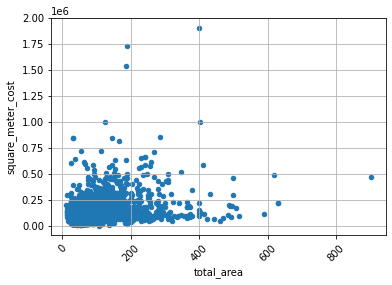

In [60]:
df.plot(x='total_area', y='square_meter_cost', kind='scatter', grid=True)
plt.xticks(rotation = 45);

In [61]:
df['square_meter_cost'].corr(df['total_area'])

0.30196021001472556

Коэффициент корреляции, как и распределение точек на диаграмме рассеяния говорит о том, что цена квадратного метра находится в слабой прямой зависимости от площади квартиры. 

**Зависимость цены от числа комнат**

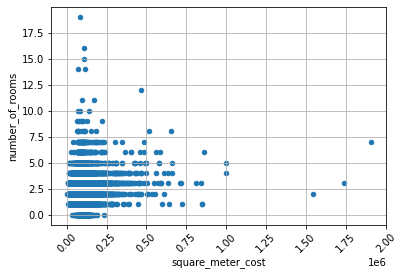

In [62]:
df.plot(x='square_meter_cost', y='number_of_rooms', kind='scatter', grid=True)
plt.xticks(rotation = 45);

In [63]:
df['square_meter_cost'].corr(df['number_of_rooms'])

0.05541965593528785

Коэффициент корреляции, как и распределение точек на диаграмме рассеяния говорит о том, что зависимость цены квадратного метра от количества комнат отсутствует.

Построим столбчатую диаграмму средних цен за метр для квартир с разным количестовм комнат.

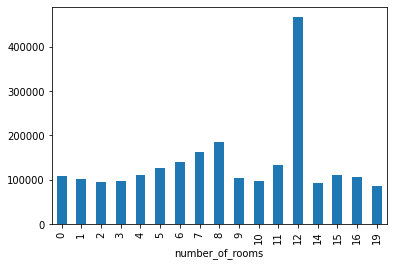

In [64]:
df.groupby('number_of_rooms')['square_meter_cost'].mean().plot.bar();

Как видно на графике, средняя стоимость квадратного метра постепенно падает для квартир от студий (0 комнат) до двухкомнатных квартир. Далее стоимость начинает расти вплоть до восьмикомнатных квартир. В целом это соответствует представлениям о том, что для квартир, покупаемых для жилья (0-2 комнаты) определяющим фактором при выборе будет цена. Квартиры большей комнтаности относятся к премиум категории, решение о покупке такой квартиры в меньшей степени зависит от фактора цены.

In [65]:
df.query('number_of_rooms == 9').head(20)

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio,last_price_mil
8822,14,"49,968,900.00",398.00,2017-07-12,9,3.00,2.00,160.10,1,False,False,False,41.00,NaN,санкт-петербург,"17,720.00","16,722.00",3.00,471.00,2.00,440.00,471.00,"125,550.00",Wednesday,July,2017,первый,0.40,0.10,49.97
8860,12,"17,000,000.00",235.00,2018-07-14,9,3.00,6.00,179.20,3,False,False,False,14.30,NaN,санкт-петербург,"24,466.00","5,034.00",1.00,346.00,0.00,NaN,90.00,"72,340.43",Saturday,July,2018,другой,0.76,0.06,17.00
9550,10,"23,500,000.00",313.00,2017-02-13,9,3.20,6.00,179.20,5,False,False,False,13.20,NaN,санкт-петербург,"38,435.00","10,138.00",1.00,146.00,0.00,NaN,NaN,"75,079.87",Monday,February,2017,другой,0.57,0.04,23.50
13019,0,"22,250,000.00",249.90,2019-04-23,9,3.20,5.00,157.00,5,False,False,False,12.40,NaN,санкт-петербург,"10,328.00","9,987.00",2.00,352.00,0.00,NaN,NaN,"89,035.61",Tuesday,April,2019,последний,0.63,0.05,22.25
13397,14,"19,500,000.00",309.70,2016-02-03,9,NaN,5.00,199.00,5,False,False,False,14.30,0.00,санкт-петербург,"10,328.00","9,987.00",2.00,352.00,0.00,NaN,468.00,"62,964.16",Wednesday,February,2016,последний,0.64,0.05,19.50
15151,15,"88,000,000.00",400.00,2019-03-27,9,2.50,2.00,250.00,1,False,False,False,50.00,NaN,санкт-петербург,"24,395.00","2,725.00",2.00,315.00,1.00,578.00,NaN,"220,000.00",Wednesday,March,2019,первый,0.62,0.12,88.00
16915,14,"29,000,000.00",292.20,2017-01-12,9,3.35,5.00,225.90,4,False,False,False,32.90,1.00,санкт-петербург,"24,892.00","5,162.00",2.00,263.00,0.00,NaN,825.00,"99,247.09",Thursday,January,2017,другой,0.77,0.11,29.00
20791,0,"24,000,000.00",250.00,2019-04-23,9,3.20,5.00,160.60,3,False,False,False,11.70,NaN,санкт-петербург,"10,328.00","9,987.00",2.00,352.00,0.00,NaN,NaN,"96,000.00",Tuesday,April,2019,другой,0.64,0.05,24.00


**Зависимость цены от удаленности от центра**

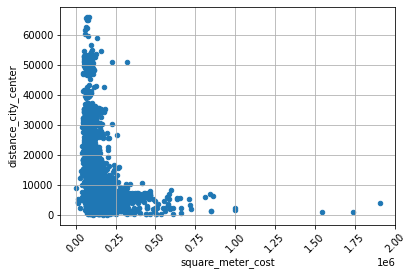

In [66]:
df.plot(x='square_meter_cost', y='distance_city_сenter', kind='scatter', grid=True)
plt.xticks(rotation = 45);

In [67]:
df['square_meter_cost'].corr(df['distance_city_сenter'])

-0.31795076959343455

Отрицательный коэффициент корреляции говорит о том, что цена квартиры находится в обратной зависимости от удаленности от центра - чем меньше значение показателя удаленности, тем выше цена квартиры. Так же на графике видно, что ближе к центру значительно больше дорогих квартир. Величина 0,3 показывает, что завиcимость выражена слабо.

**Зависимость цены от этажа**

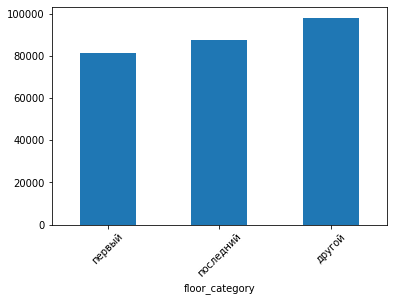

In [68]:
df.groupby('floor_category')['square_meter_cost'].median().sort_values().plot.bar()
plt.xticks(rotation = 45);

Как видно на графике, самой низкой является цена квадратного метра на 1 этаже, на последнем этаже цена выше, чем на первом; самая высокая цена на остальных этажах, кроме первого и последнего.

**Зависимость цены от от даты размещения: дня недели, месяца и года**

(0.0, 200000.0)

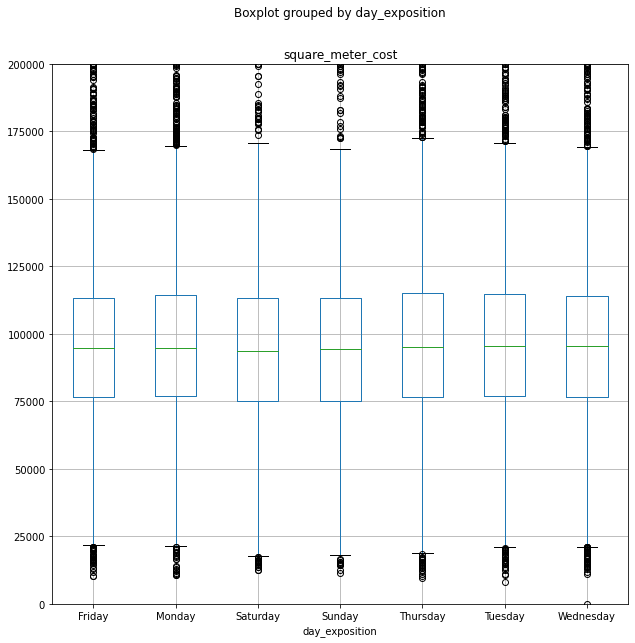

In [69]:
df.boxplot('square_meter_cost', by='day_exposition',figsize=(10,10)).set_ylim(0,200000)

(0.0, 200000.0)

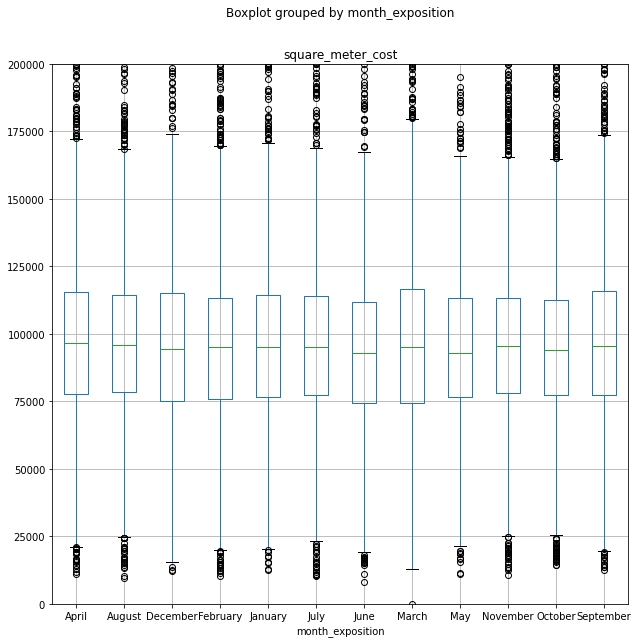

In [70]:
df.boxplot('square_meter_cost', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)

(0.0, 200000.0)

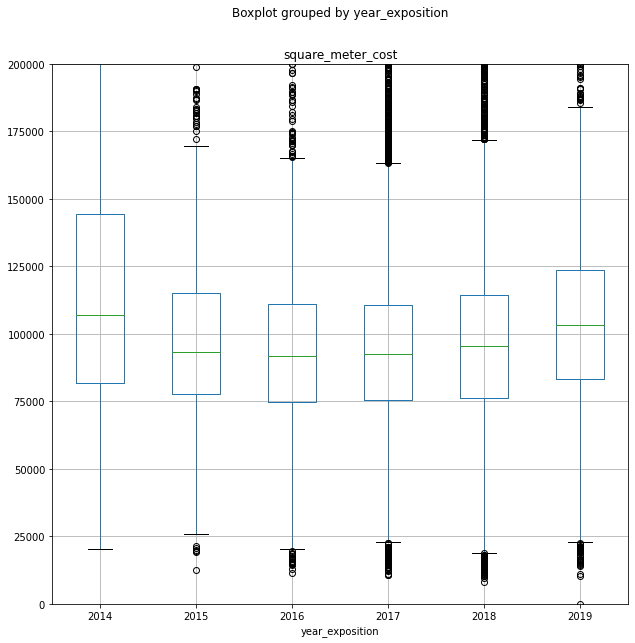

In [71]:
df.boxplot('square_meter_cost', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

Построенные диаграммы размаха показывают, что нет зависимости цены квадратного метра от дня и месяца публикации объявления. Зависимость цены от года публикации обусловлена состоянием экономической активности в разные годы.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

Эти данные можно найти по имени в столбце locality_name

In [72]:
df['locality_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [73]:
df.query('locality_name in ["санкт-петербург", "поселок мурино", "поселок шушары", "всеволожск", "пушкин", "колпино", "поселок парголово", "гатчина", "деревня кудрово", "выборг"]').groupby('locality_name')['square_meter_cost'].mean().sort_values(ascending=False)

locality_name
санкт-петербург     114,849.01
пушкин              103,125.82
деревня кудрово      92,473.55
поселок парголово    90,175.91
поселок мурино       85,681.76
поселок шушары       78,677.36
колпино              75,424.58
гатчина              68,746.15
всеволожск           68,654.47
выборг               58,141.91
Name: square_meter_cost, dtype: float64

Самая высокая стоимость квадратного метра недвижимости, ожидаемо, оказаласть в Санкт-Петербурге. Следом идет район города Пушкин и ближайшие к Санкт-Петербургу населенные пункты Ленинградской области, расположенные в непосредственной близости от станций метрополитена. Самая низкая стоимость квадратного метра в наиболее удаленных от Петербурга населенных пунктах Ленинградской области. 

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [74]:
df_spb = df.query('locality_name == "санкт-петербург"')
df_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio,last_price_mil
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,March,2019,другой,0.47,0.23,13.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,False,False,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,August,2015,другой,0.61,0.15,5.20
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,45.00,9,False,False,False,9.50,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,July,2015,другой,0.28,0.06,64.90
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,June,2018,другой,0.32,0.41,10.00
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24.00,30.50,22,False,False,False,18.90,2.00,санкт-петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,"110,544.69",Thursday,April,2019,другой,0.43,0.26,7.92


In [75]:
df_spb['distance_city_сenter_km'] = (round((df_spb['distance_city_сenter']/1000), 0))
df_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio,last_price_mil,distance_city_сenter_km
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,NaN,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,March,2019,другой,0.47,0.23,13.00,16.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,False,False,8.30,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,August,2015,другой,0.61,0.15,5.20,14.00
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,45.00,9,False,False,False,9.50,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,July,2015,другой,0.28,0.06,64.90,7.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,NaN,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,June,2018,другой,0.32,0.41,10.00,8.00
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24.00,30.50,22,False,False,False,18.90,2.00,санкт-петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,"110,544.69",Thursday,April,2019,другой,0.43,0.26,7.92,12.00


In [76]:
df_spb.groupby('distance_city_сenter_km')['square_meter_cost'].mean()

distance_city_сenter_km
0.00    245,833.53
1.00    177,005.41
2.00    157,849.01
3.00    121,387.45
4.00    133,282.87
5.00    140,509.79
6.00    151,012.19
7.00    156,176.88
8.00    125,671.44
9.00    113,131.04
10.00   112,727.52
11.00   108,630.84
12.00   107,488.73
13.00   108,148.13
14.00   104,252.39
15.00   104,231.98
16.00   100,542.61
17.00    96,597.65
18.00    96,362.26
19.00    98,652.74
20.00   103,045.18
21.00    94,469.58
22.00    91,330.43
23.00    91,828.52
24.00    85,736.90
25.00    91,531.37
26.00    89,285.88
27.00   132,115.71
28.00    81,161.92
29.00    72,953.37
Name: square_meter_cost, dtype: float64

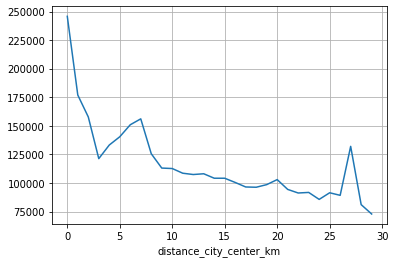

In [77]:
df_spb.groupby('distance_city_сenter_km')['square_meter_cost'].mean().plot(grid=True);

На графике видно, что после прохождения точки в 7 км от центра города цена квадратного местра резко падает на 24% (цена квадартного метра для расстояния 7 км - 156 176 тыс. руб.; цена квадартного метра для расстояния 8 км - 125 671 тыс. руб.). Это позволяет сделать вывод, что к центральной части города относится область 7 километров от центра.

Заметно повышение стоимости квадратного метра на расстоянии 20 км от центра - вероятно, на этом расстоянии могут располагаться загородные коттеджные поселки с дорогой недвижимостью.

Цена квадратного метра для 27 км выглдят, как выброс - проверим, как выглядт объекты для данного расстояния.

In [78]:
df_spb.query('distance_city_сenter_km == 27')

,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,open_plan,kitchen_area,number_of_balconies,locality_name,distance_nearest_airport,distance_city_сenter,parks_around_3000_m,distance_nearest_park,ponds_around_3000_m,distance_nearest_ponds,days_exposition,square_meter_cost,day_exposition,month_exposition,year_exposition,floor_category,living_total_area_ratio,kitchen_total_area_ratio,last_price_mil,distance_city_сenter_km
748,13,"14,350,000.00",74.00,2017-11-28,2,3.13,5.00,30.00,3,False,False,False,25.00,NaN,санкт-петербург,"23,888.00","27,313.00",1.00,"1,496.00",0.00,NaN,128.00,"193,918.92",Tuesday,November,2017,другой,0.41,0.34,14.35,27.00
5961,6,"2,250,000.00",32.00,2018-02-27,1,NaN,2.00,16.50,2,False,False,False,7.00,NaN,санкт-петербург,"24,006.00","27,431.00",0.00,NaN,0.00,NaN,178.00,"70,312.50",Tuesday,February,2018,последний,0.52,0.22,2.25,27.00


На срезе видно, что на расстоянии 27 км представлено всего 2 объекта, один из которых, верояно, является объектом премиум класса с высокой ценой квадратного метра 193 918 руб. Исключим этот объект из выборки и заново построим график.

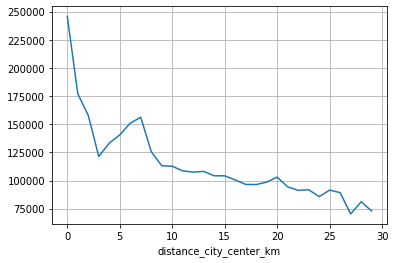

In [79]:
df_spb.query('last_price != 14350000').groupby('distance_city_сenter_km')['square_meter_cost'].mean().plot(grid=True);

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [80]:
df_spb.query('distance_city_сenter_km < 7')[['total_area', 'square_meter_cost', 'last_price','number_of_rooms', 'ceiling_height']].describe()

,total_area,square_meter_cost,last_price,number_of_rooms,ceiling_height
count,"3,105.00","3,105.00","3,105.00","3,105.00","2,020.00"
mean,94.67,"143,747.02","14,911,812.31",2.89,3.12
std,60.32,"94,121.08","25,101,281.31",1.49,0.38
min,12.00,"15,345.27","1,600,000.00",0.00,2.40
25%,58.70,"99,361.90","6,800,000.00",2.00,2.88
50%,80.00,"123,333.33","9,386,000.00",3.00,3.05
75%,111.00,"154,776.30","14,400,000.00",4.00,3.30
max,631.20,"1,907,500.00","763,000,000.00",19.00,6.00


**Площадь**

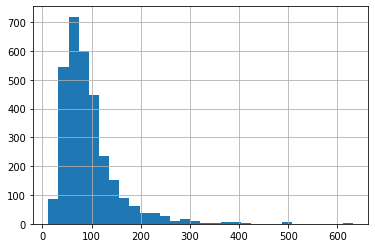

In [81]:
df_spb.query('distance_city_сenter_km < 7')['total_area'].hist(bins=30);

Построенная гистограмма не дает представления о распределении площади из-за выбросов. Т.к. большинство квартир имеют площадь до 400 кв. метров, ограничим шкалу абсцисс этим значением.

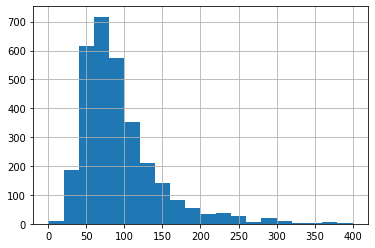

In [82]:
df_spb.query('distance_city_сenter_km < 7')['total_area'].hist(bins=20, range = (0, 400));

Распределение данных на гистограмме говорит о том, что преобладают квартиры с площадью от 60 до 80 квадратных метров - их порядка 700. Следующими идут квартиры площадью от 40 до 60 - таких объектов около 600. С увеличением площади количество представленных квартир этой площади снижается: от 80 до 100 кв. метров - приблизительно 580 квартир, от 100 до 120 - 350 квартир, от от 120 до 140 - 200 квартир, и т.д. Количество квартир небольшой площади - от 20 до 40 метров составляет около 190.

**Цена**

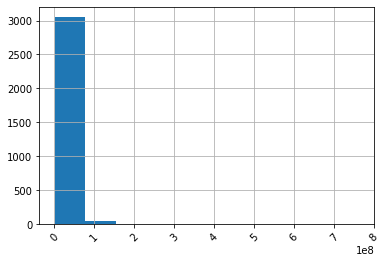

In [83]:
df_spb.query('distance_city_сenter_km < 7')['last_price'].hist(bins=10)
plt.xticks(rotation = 45);

Построенная гистограмма не дает представления о распределении цен квартир из-за выбросов. Рассмотрим данный столбец при помощи диаграммы размаха и метода describe().

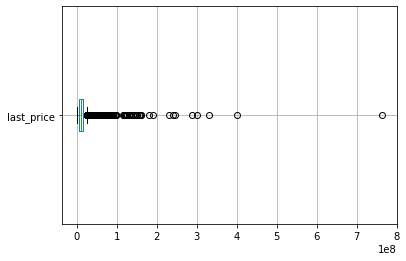

In [84]:
df_spb.query('distance_city_сenter_km < 7').boxplot(column=['last_price'], vert=False);

In [85]:
df_spb.query('distance_city_сenter_km < 7')['last_price'].describe()

count         3,105.00
mean     14,911,812.31
std      25,101,281.31
min       1,600,000.00
25%       6,800,000.00
50%       9,386,000.00
75%      14,400,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Как видно, максимальное значение в 763 млн. дает сильное смещение распределения вправо. Найдем межквартильный размах и рассчитаем значние правого уса, чтобы отсечь выбросы.

In [86]:
14400000+(14400000-6800000)*1,5

(22000000, 5)

Построим график, ограничив ось абсцисс найденным значением.

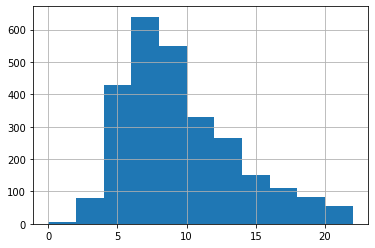

In [87]:
df_spb.query('distance_city_сenter_km < 7')['last_price_mil'].hist(bins=11, range = (0, 22));

Основную долю в выборке - около 650 - составляют квартиры стоимостью от 6 до 8 млн руб. Следующая по кличеству объектов группа - квартиры стоимостью от 8 до 10 млн - таких около 550. Квартир стоимостью от 4 до 6 млн порядка 420. Остальные ценовые группы включают 320 и менее квартир.

**Количество комнат**

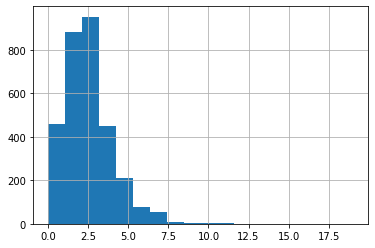

In [88]:
df_spb.query('distance_city_сenter_km < 7')['number_of_rooms'].hist(bins=18);

Большинстов квартир в центре имеют 3 комнаты - таких объектов около 900. Чуть меньше квартир с 2 комнатами - около 850. Практически равное количество однокомнатных и четырехкомнатных квартир - около 450. Квартир с 5 комнатами - чуть больше 200. Квартиры с большим количестовм комнат незначительно представлены среди квартир в центре.

**Высота потолков**

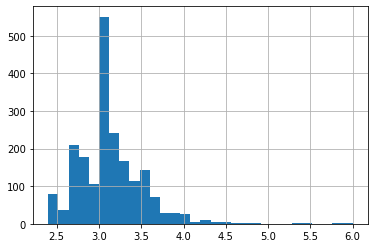

In [89]:
df_spb.query('distance_city_сenter_km < 7')['ceiling_height'].hist(bins=30);

Большинство квартир (около 550) имеют высоту потолков 3,0-3,1 м. Следующая по численности группа 3,1-3,2 м - около 250 квартир. Квартиры с высотой 3 и более метра преобладают в выборке над квартирами с высотой менее 3 метров.

In [90]:
df.median()

total_images                       9.00
last_price                 4,650,000.00
total_area                        52.00
number_of_rooms                    2.00
ceiling_height                     2.65
floors_total                       9.00
living_area                       30.30
floor                              4.00
is_apartment                       0.00
is_studio                          0.00
open_plan                          0.00
kitchen_area                       9.04
number_of_balconies                1.00
distance_nearest_airport      26,726.00
distance_city_сenter          13,098.50
parks_around_3000_m                0.00
distance_nearest_park            455.00
ponds_around_3000_m                1.00
distance_nearest_ponds           502.00
days_exposition                   95.00
square_meter_cost             95,000.00
year_exposition                2,017.00
living_total_area_ratio            0.57
kitchen_total_area_ratio           0.17
last_price_mil                     4.65


Сравним медианные параметры квартир в центре и в общей выборке:
- площадь: в центре - 80 кв. м; в общей выборке - 52 кв. м;
- цена квадратного метра: в центре - 123 529 руб.; в общей выборке - 95 000 руб.;
- число комнат: в центре - 3; в общей выборке - 2;
- высота потолков: в центре - 3.0; в общей выборке -2.65.

Как видно из представленных данных, квартиры в центре больше по площади, количеству комнат и дороже за квадратный метр - вероятно, это связано с тем, что большое количестов квартир в центре относятся к премиум сегменту. Высота потолков в центре так же больше, что может быть обусловлено как статусом квартир, так и наличием в центре домов дореволюционной постройки с высокими потолками.

**Зависимость цены от площади квартиры**

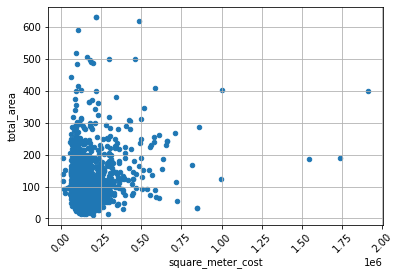

In [91]:
df_spb.query('distance_city_сenter_km < 7').plot(x='square_meter_cost', y='total_area', kind='scatter', grid=True)
plt.xticks(rotation = 45);

In [92]:
df_spb.query('distance_city_сenter_km < 7')['square_meter_cost'].corr(df_spb.query('distance_city_сenter_km < 7')['total_area'])

0.22960761398421703

Коэффициент корреляции, как и распределение точек на диаграмме рассеяния говорит о том, что цена квадратного метра находится в слабой прямой зависимости от площади квартиры. Зависимость чуть меньше, чем для всей выборки в целом (0,3)

**Зависимость цены от числа комнат**

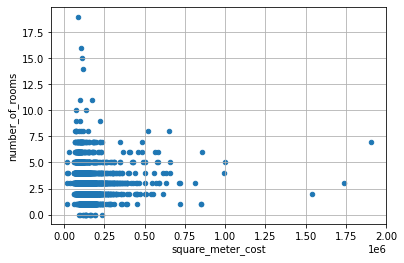

In [93]:
df_spb.query('distance_city_сenter_km < 7').plot(x='square_meter_cost', y='number_of_rooms', kind='scatter', grid=True);

In [94]:
df_spb.query('distance_city_сenter_km < 7')['square_meter_cost'].corr(df['number_of_rooms'])

-0.018702137268239365

Коэффициент корреляции, как и распределение точек на диаграмме рассеяния говорит о том, что зависимость цены квадратного метра от количества комнат отсутствует, так же как и по всей выборке.

**Зависимость цены от удаленности от центра**

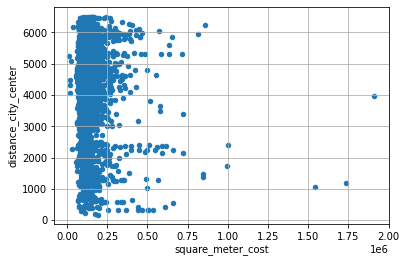

In [95]:
df_spb.query('distance_city_сenter_km < 7').plot(x='square_meter_cost', y='distance_city_сenter', kind='scatter', grid=True);

In [96]:
df_spb.query('distance_city_сenter_km < 7')['square_meter_cost'].corr(df['distance_city_сenter'])

-0.051931308681456886

Коэффициент корреляции, как и распределение точек на диаграмме рассеяния говорит о том, что зависимость цены квадратного местра от удаленности от центра отсутствует - в целом это отражает то, что все исследуемые объекты находятся в центре. При анализе всей выборки в целом коэффициент корреляции был больше (-0,31).

**Зависимость цены от этажа**

In [97]:
df_spb.query('distance_city_сenter_km < 7').groupby('floor_category')['square_meter_cost'].median()

floor_category
другой      126,803.95
первый      110,027.86
последний   117,741.94
Name: square_meter_cost, dtype: float64

Как видно из сгруппированных данных, самой низкой является цена квадратного местра на 1 этаже, на последнем этаже цена выше, чем на первом; самая высокая цена на остальных этажах, кроме первого и последнего. Такая же зависимость наблюдалась и для всей выборки.

**Зависимость цены от от даты размещения: дня недели, месяца и года**

(0.0, 200000.0)

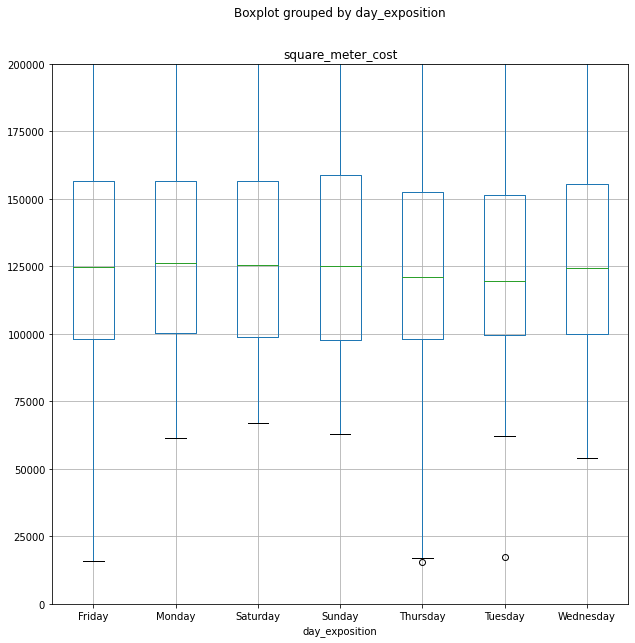

In [98]:
df_spb.query('distance_city_сenter_km < 7').boxplot('square_meter_cost', by='day_exposition',figsize=(10,10)).set_ylim(0,200000)

(0.0, 200000.0)

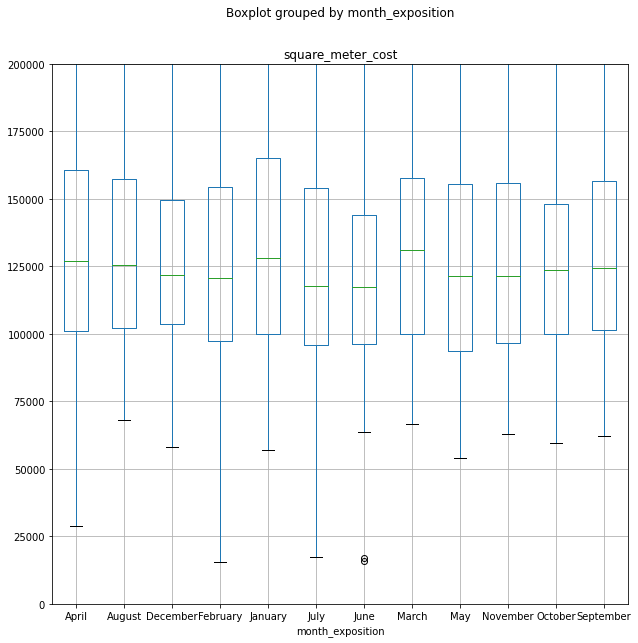

In [99]:
df_spb.query('distance_city_сenter_km < 7').boxplot('square_meter_cost', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)

(0.0, 200000.0)

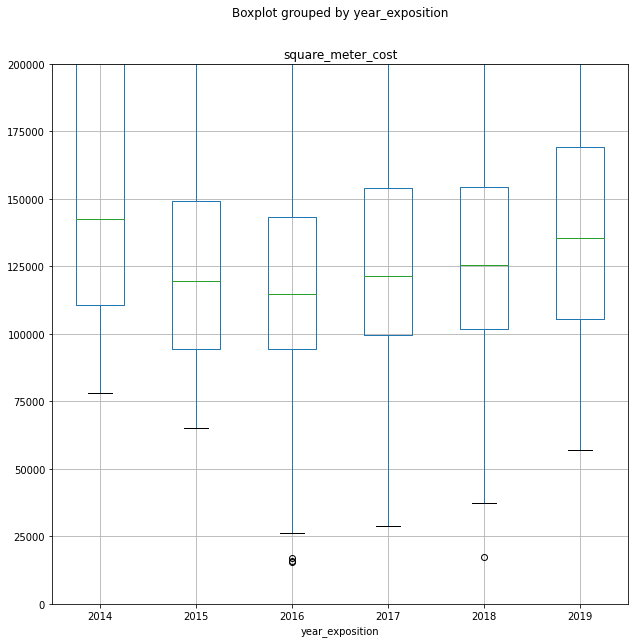

In [100]:
df_spb.query('distance_city_сenter_km < 7').boxplot('square_meter_cost', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

Построенные диаграммы размаха показывают, что нет зависимости цены квадратного метра от дня и месяца публикации объявления. Зависимость цены от года публикации обусловлена состоянием экономической активности в разные годы. Ситуация в целом аналогична той, что наблюдается для выборки в целом. Для квартир в центре можно подчеркнуть чуть больший разброс медианной цены в зависимости от месяца публикации, но, скорее всего, это обусловлено тем, что в этой выборке меньше объектов и сильнее выражена значимость выбросов. 

## Общий вывод

- Медианное время продажи квартиры - 95 дней, среднее время продажи - 180 дней, превышение среднего над медианным почти в 2 раза вызвано выбросами;
- Квартиры с более высокой стоимотью (обусловленной как большей площадью, так и большей ценой квадратного метра) продаются дольше;
- Зависимость стоимости квадратного метра от площади квартиры, числа комнат, даты публикации практически отсутствует как для всей выборки, так и для квартир в центре;
- Зависимость стоимости квадратного метра от удаленности от центра отрицательная, выражена слабо;
- Самая низкая стоимость квадратного метра у квартир на 1 этаже, далее идут квартиры на последнем этаже, а самые дорогие - на остальных этажах;
- Квартиры в Санкт-Петербурге дороже, чем в других населенных пунктах; следом идут квартиры в населенных пунктах Ленинградской области, расположенных в непосредственной близости от метро; самая низкая стоимость в удаленных населенных пунктах Ленинградской области.
- При удалении от центра стоимость квадратного метра падает; к центральной области относятся квартиры на удалении до 7 км от центра; есть пояс около 20 км от центра с более дорогой недвижимостью (очевидно, коттеджные поселки).

**Рекомендации:**
- уделить больше внимания автоматическому заполнению данных по расстоянию до парков и водоемов, чтоб было меньше пропусков;
- сделать обязательным для заполнения поле про статус апартаментов;
- добавить проверку заполненного значения высоты потолков.